## 美国King County房价预测训练赛

https://www.kaggle.com/harlfoxem/housesalesprediction

数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。
数据分为训练数据和测试数据，分别保存在kc_train.csv和kc_test.csv两个文件中。
其中训练数据主要包括10000条记录，14个字段，主要字段说明如下：
第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期
第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值
第三列“卧室数”：房屋中的卧室数目
第四列“浴室数”：房屋中的浴室数目
第五列“房屋面积”：房屋里的生活面积
第六列“停车面积”：停车坪的面积
第七列“楼层数”：房屋的楼层数
第八列“房屋评分”：King County房屋评分系统对房屋的总体评分
第九列“建筑面积”：除了地下室之外的房屋建筑面积
第十列“地下室面积”：地下室的面积
第十一列“建筑年份”：房屋建成的年份
第十二列“修复年份”：房屋上次修复的年份
第十三列"纬度"：房屋所在纬度
第十四列“经度”：房屋所在经度

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from scipy import stats
%matplotlib inline



In [3]:
#读取数据
path=r'D:\Users\jx_luo\Downloads\美国King County房价预测训练赛\kc_train.csv'
file=open(path)
data=pd.read_csv(file, encoding='utf-8',header=None)
data.columns=['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','distance']


#预测集
path=r'D:\Users\jx_luo\Downloads\美国King County房价预测训练赛\kc_test.csv'
file=open(path)
test=pd.read_csv(file, encoding='utf-8',header=None)
test.columns=['date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','distance']


In [4]:
data.drop('date', axis=1, inplace=True)
#data.drop(['lat','long'], axis=1, inplace=True)

In [5]:
print(data.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
distance         0
dtype: int64


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
price            10000 non-null int64
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
floors           10000 non-null float64
grade            10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
distance         10000 non-null float64
dtypes: float64(5), int64(9)
memory usage: 1.1 MB
None


In [7]:
#data.head(5)
type(centroids)

NameError: name 'centroids' is not defined

In [ ]:
np.array(dataSet)[0][0]
#plt.scatter(data['lat'],data['long'],c=data['grade'])

In [11]:
from sklearn.cluster import KMeans

n_clusters=6
dataSet=data[['lat','long']]
clf=KMeans(n_clusters=n_clusters, random_state=9)
s=clf.fit(dataSet)

[5 1 1 ... 5 5 0]
72.06253074153283


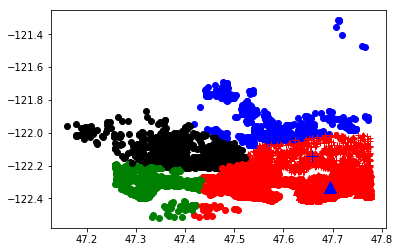

In [12]:
print(clf.labels_)
print(clf.inertia_)
numSamples=len(dataSet)

dataSet=np.array(dataSet)
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#画出所有样例点 属于同一分类的绘制同样的颜色
for i in range(numSamples):
    plt.plot(dataSet[i][0], dataSet[i][1], mark[clf.labels_[i]])
   
 
mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
# 画出质点，用特殊图型
centroids =clf.cluster_centers_
for i in range(n_clusters):
    plt.plot(centroids[i][0], centroids[i][1], mark[i], markersize = 12)

plt.show()

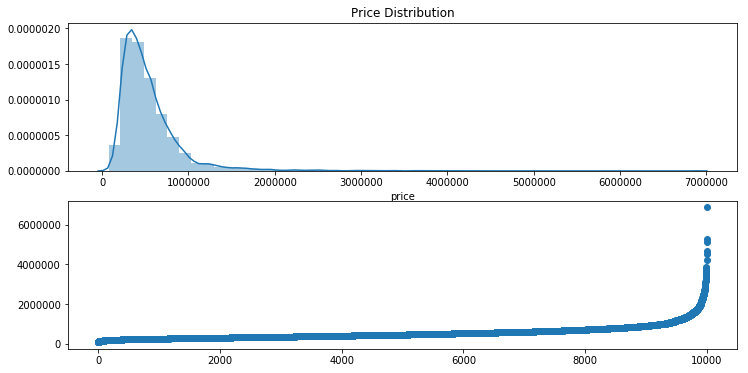

In [216]:
plt.figure(figsize=(12,6))
#绘制价格的数据分布曲线
plt.subplot(211)
plt.title('Price Distribution')
sns.distplot(data['price'])
#绘制价格曲线
plt.subplot(212)
plt.scatter(range(data.shape[0]), np.sort(data['price'].values))
plt.show()


In [217]:
#查看特征统计信息
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,1.000000e+04,10000.000000,10000.0000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.428749e+05,3.367600,2.1168,2082.488400,1.535273e+04,1.502850,7.664800,1791.474900,291.013500,1971.204700,85.209700,47.560629,-122.215845
std,3.729258e+05,0.893169,0.7741,922.878916,4.577623e+04,0.543642,1.173873,829.449437,446.641339,29.322957,403.491421,0.138570,0.139739
min,7.500000e+04,0.000000,0.0000,390.000000,5.720000e+02,1.000000,3.000000,390.000000,0.000000,1900.000000,0.000000,47.159300,-122.519000
25%,3.225000e+05,3.000000,1.7500,1430.000000,5.023250e+03,1.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,47.471375,-122.329000
50%,4.507000e+05,3.000000,2.2500,1910.000000,7.590000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.572200,-122.234000
75%,6.450000e+05,4.000000,2.5000,2550.000000,1.071700e+04,2.000000,8.000000,2211.500000,560.000000,1997.000000,0.000000,47.678400,-122.127000
max,6.885000e+06,10.000000,7.7500,9890.000000,1.651359e+06,3.500000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


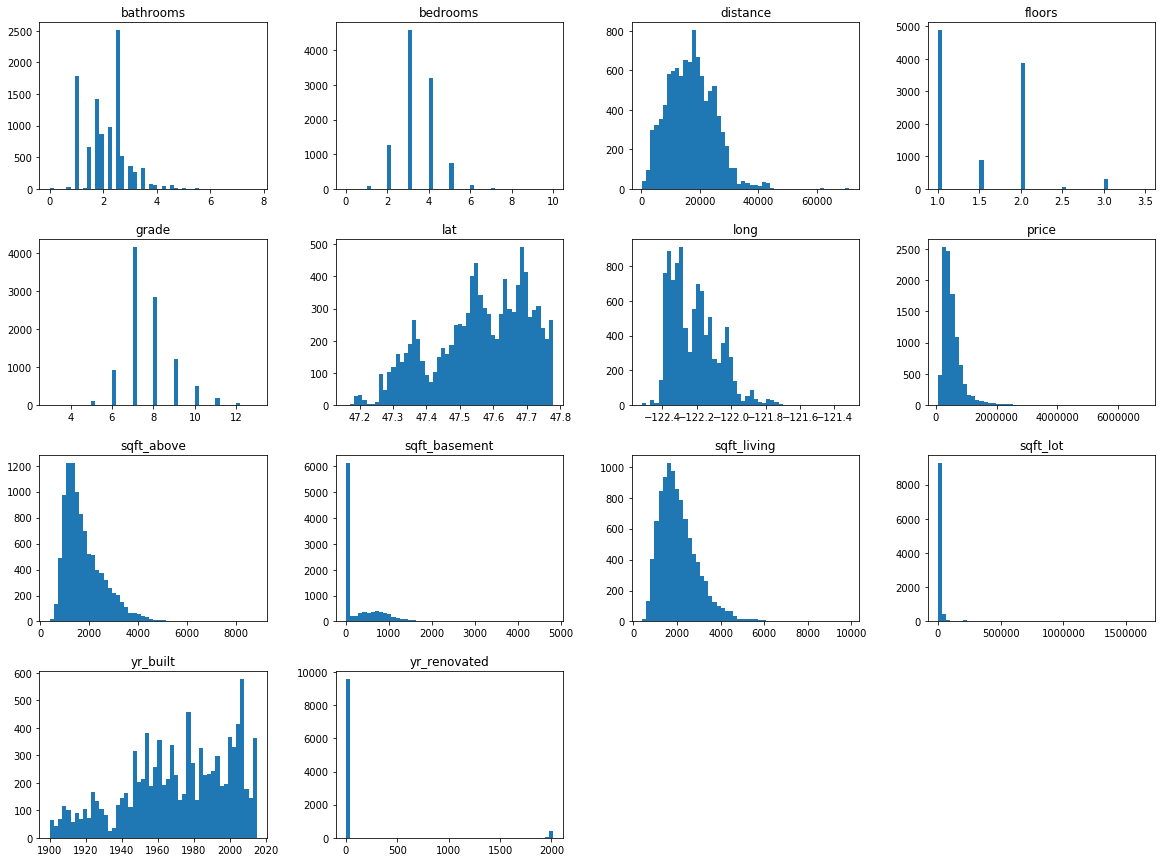

In [11]:
#绘制各个特征的分布柱状图
data.hist(figsize=(20,15), bins=50, grid=False)
plt.show()

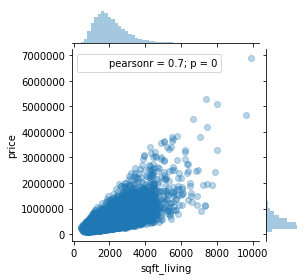

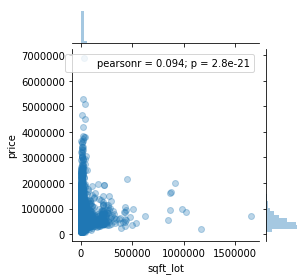

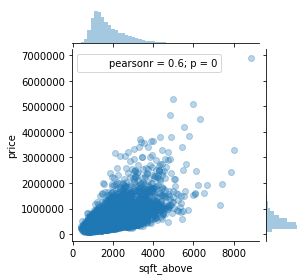

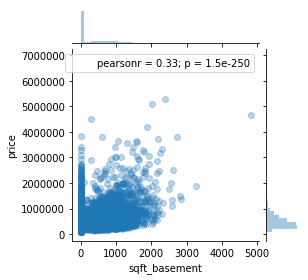

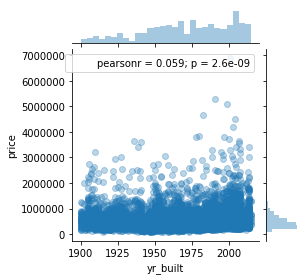

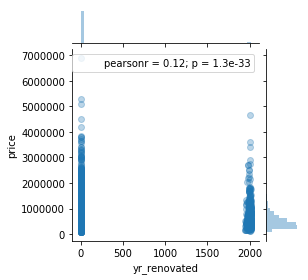

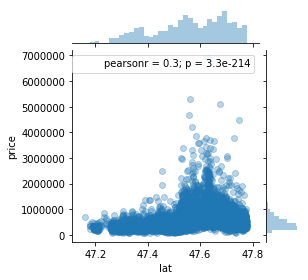

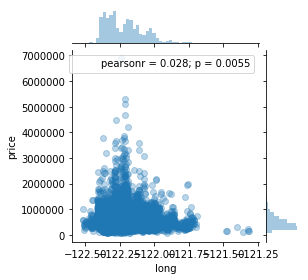

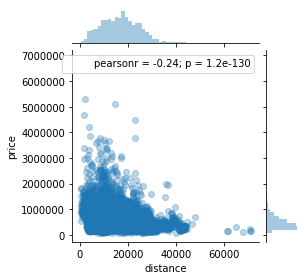

In [12]:
#皮尔森相关系数
continuous_cols=['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','distance']

for col in continuous_cols:
    g=sns.jointplot(x=col,y='price',data=data, alpha=0.3, size=4)
    g.annotate(stats.pearsonr)


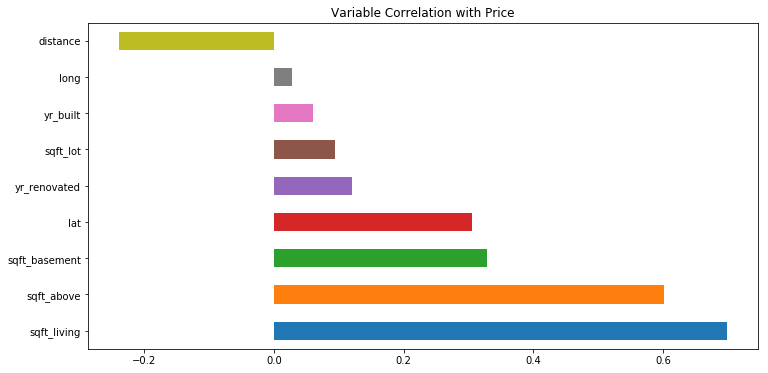

In [13]:
plt.figure(figsize=(12,6))
data.corr()['price'][continuous_cols].sort_values(ascending=False).plot(
    'barh',figsize=(12,6), title='Variable Correlation with Price')

In [71]:
#sqft_basement,yr_renovated存在很多为0的数据，所以可以考虑构建新的二值特征分别用来表示是否有地下室，是否曾翻新过。
data['basement_present']=data['sqft_basement'].apply(lambda x:1 if x>0 else 0)
test['basement_present']=test['sqft_basement'].apply(lambda x:1 if x>0 else 0)
data['renovated']=data['yr_renovated'].apply(lambda x:1 if x>0 else 0)
test['renovated']=test['yr_renovated'].apply(lambda x:1 if x>0 else 0)

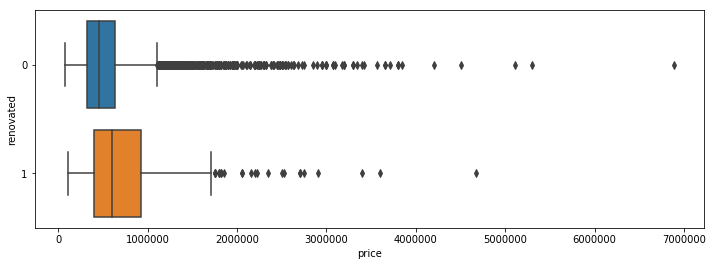

renovated 与 price 的点二列相关系数中 r = 0.12001849968412436, p= 2.088308248694044e-33 
basement_present 与 price 的点二列相关系数中 r = 0.18330716277977743, p= 2.7139191120161128e-76 


In [15]:
#上面构建的basement_present，renovated 属于分类变量，可以使用点二列相关系数来计算两个变量之间的关系

from scipy.stats import pointbiserialr

#绘制箱形图
plt.figure(figsize=(12,4))
sns.boxplot(y='renovated', x='price', data=data, orient='h')
plt.show()

#计算二列相关系数
r,p=pointbiserialr(data['renovated'],data['price'])
print('renovated 与 price 的点二列相关系数中 r = %s, p= %s ' %(r,p))
r,p=pointbiserialr(data['basement_present'],data['price'])
print('basement_present 与 price 的点二列相关系数中 r = %s, p= %s ' %(r,p))

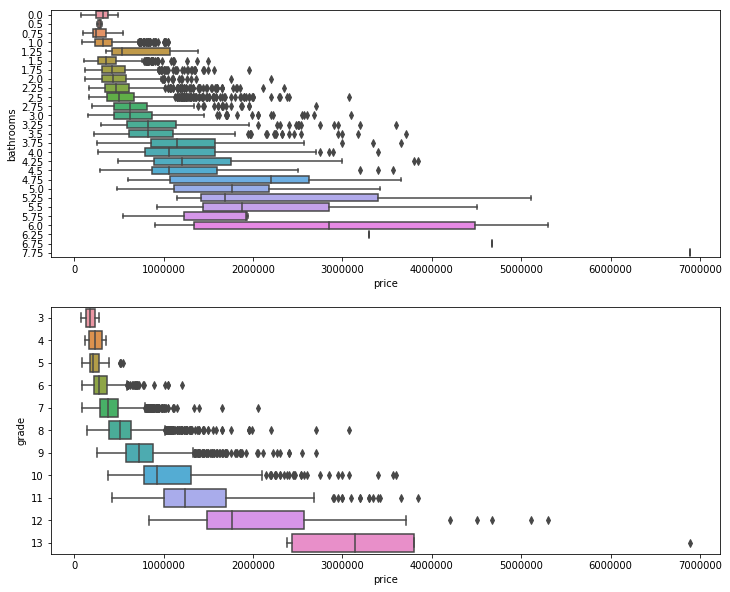

In [234]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.boxplot(y='bathrooms', x='price', data=data, orient='h')
plt.subplot(212)
sns.boxplot(y='grade', x='price', data=data, orient='h')
plt.show()

In [16]:
from scipy.stats import spearmanr

r,p=spearmanr(data['floors'], data['price'])
print('floors 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['bedrooms'], data['price'])
print('bedrooms 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['bathrooms'], data['price'])
print('bathrooms 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['grade'], data['price'])
print('grade 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))
r,p=spearmanr(data['distance'], data['price'])
print('distance 与 price 的斯皮尔曼相关系数为 %s,其中 p= %s ' %(r,p))

floors 与 price 的斯皮尔曼相关系数为 0.3127190036471108,其中 p= 9.586333125228778e-226 
bedrooms 与 price 的斯皮尔曼相关系数为 0.3458697748314727,其中 p= 5.6801269872902106e-279 
bathrooms 与 price 的斯皮尔曼相关系数为 0.5012034892956143,其中 p= 0.0 
grade 与 price 的斯皮尔曼相关系数为 0.6603554146361819,其中 p= 0.0 
distance 与 price 的斯皮尔曼相关系数为 -0.23020313905491874,其中 p= 2.1260286353249518e-120 


In [17]:
#数据预处理
ordinal_cols=['floors','grade']

for col in ordinal_cols:
    dummies=pd.get_dummies(data[col], drop_first=False)
    dummies=dummies.add_prefix("{}#".format(col))
    data.drop(col, axis=1, inplace=True)
    data=data.join(dummies)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
price               10000 non-null int64
bedrooms            10000 non-null int64
bathrooms           10000 non-null float64
sqft_living         10000 non-null int64
sqft_lot            10000 non-null int64
sqft_above          10000 non-null int64
sqft_basement       10000 non-null int64
yr_built            10000 non-null int64
yr_renovated        10000 non-null int64
lat                 10000 non-null float64
long                10000 non-null float64
basement_present    10000 non-null int64
renovated           10000 non-null int64
floors#1.0          10000 non-null uint8
floors#1.5          10000 non-null uint8
floors#2.0          10000 non-null uint8
floors#2.5          10000 non-null uint8
floors#3.0          10000 non-null uint8
floors#3.5          10000 non-null uint8
grade#3             10000 non-null uint8
grade#4             10000 non-null uint8
grade#5             10000

In [ ]:
data.drop(['lat','long'], axis=1, inplace=True)

In [85]:
#分割训练集
from sklearn.model_selection import train_test_split
np.random.seed(21)
target=data['price']
data.drop('price', axis=1, inplace=True)
x_train,x_test,y_train,y_test=train_test_split(data,target ,train_size=0.8, random_state=1)

KeyError: 'price'

In [86]:
x_train,x_test,y_train,y_test=train_test_split(data,target ,train_size=0.8, random_state=1)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
def simple_linear_model(x_train, x_test, y_train, y_test, input_feature):
    lg=LinearRegression()
    lg.fit(x_train.as_matrix(columns=[input_feature]),y_train)
    RMSE=mean_squared_error(
        y_test,lg.predict(x_test.as_matrix(columns=[input_feature]))
    )**0.5
    return RMSE

In [21]:
np.random.seed(21)
RMSE=simple_linear_model(x_train,x_test,y_train,y_test,'sqft_living')
print('validation RMSE for sqft_living is :%s' % RMSE)

validation RMSE for sqft_living is :285923.9203947337


In [87]:
estimate_result=pd.DataFrame(columns=['feature','val_RMSE'])

np.random.seed(21)

for feature in data.columns:
    RMSE=simple_linear_model(x_train,x_test,y_train,y_test, feature)
    estimate_result= estimate_result.append({'feature':feature, 'val_RMSE':RMSE}, ignore_index=True)

In [88]:
estimate_result.head(10)

,feature,val_RMSE
0,bedrooms,385113.409510
1,bathrooms,337085.699544
2,sqft_living,285923.920395
3,sqft_lot,402079.340645
4,sqft_above,317583.195531
5,sqft_basement,381837.764889
6,yr_built,403134.095891
7,yr_renovated,402129.086041
8,distance,393500.641685
9,basement_present,396679.958703


In [24]:
#多元回归
def multi_regression(x_train, x_test, y_train, y_test, input_feature):
    lg=LinearRegression()
    lg.fit(x_train.as_matrix(columns=input_feature),y_train)
    RMSE=mean_squared_error(
        y_test,lg.predict(x_test.as_matrix(columns=input_feature))
    )**0.5
    return RMSE

In [25]:
feature_combinations=[
    ['sqft_living', 'bathrooms', 'grade#10'],
    ['sqft_living', 'bathrooms', 'bedrooms'],
    ['sqft_above', 'bathrooms', 'grade#10'],
    ['sqft_basement', 'bathrooms', 'bedrooms' ],
    ['sqft_living', 'bathrooms', 'bedrooms','distance' ]
]

np.random.seed(21)

for combination in feature_combinations:
    RMSE=multi_regression(x_train, x_test, y_train, y_test, combination)
    print('RMSE for %s is %s  ' % (', '.join(combination), RMSE))

RMSE for sqft_living, bathrooms, grade#10 is 284828.4434615904  
RMSE for sqft_living, bathrooms, bedrooms is 280506.2295271217  
RMSE for sqft_above, bathrooms, grade#10 is 308559.8395924313  
RMSE for sqft_basement, bathrooms, bedrooms is 330791.0167973147  
RMSE for sqft_living, bathrooms, bedrooms, distance is 269626.3007887324  


In [26]:

feature_combinations


[['sqft_living', 'bathrooms', 'grade#10'],
 ['sqft_living', 'bathrooms', 'bedrooms'],
 ['sqft_above', 'bathrooms', 'grade#10'],
 ['sqft_basement', 'bathrooms', 'bedrooms'],
 ['sqft_living', 'bathrooms', 'bedrooms', 'distance']]

In [66]:

x_train['sqft_living_squared']=x_train['sqft_living'].apply(lambda x:x**2)
x_test['sqft_living_squared']=x_test['sqft_living'].apply(lambda x:x**2)
test['sqft_living_squared']=test['sqft_living'].apply(lambda x:x**2)
x_train['sqft_above_squared']=x_train['sqft_above'].apply(lambda x:x**2)
x_test['sqft_above_squared']=x_test['sqft_above'].apply(lambda x:x**2)
test['sqft_above_squared']=test['sqft_above'].apply(lambda x:x**2)

squared_combinations=[
     ['sqft_living', 'sqft_living_squared'],
     ['sqft_above', 'sqft_above_squared']
]

np.random.seed(21)


for squared_combination in squared_combinations:
    RMSE=multi_regression(x_train, x_test, y_train, y_test, squared_combination)
    print('RMSE for %s is %s  ' % (', '.join(squared_combination), RMSE))

RMSE for sqft_living, sqft_living_squared is 269229.9748621273  
RMSE for sqft_above, sqft_above_squared is 307913.9359206408  


In [53]:
np.random.seed(21)

RMSE=multi_regression(x_train, x_test, y_train, y_test, x_train.columns)
print('RMSE for all features before construction is : %s' %  RMSE)

RMSE for all features before construction is : 212109.87793415485


In [67]:
x_train['sqft_living_cubed']=x_train['sqft_living'].apply(lambda x:x**3)
x_test['sqft_living_cubed']=x_test['sqft_living'].apply(lambda x:x**3)
test['sqft_living_cubed']=test['sqft_living'].apply(lambda x:x**3)

x_train['bedrooms_cubed']=x_train['bedrooms'].apply(lambda x:x**3)
x_test['bedrooms_cubed']=x_test['bedrooms'].apply(lambda x:x**3)
test['bedrooms_cubed']=test['bedrooms'].apply(lambda x:x**3)


x_train['bed_bath_rooms']=x_train['bedrooms'] * x_train['bathrooms']
x_test['bed_bath_rooms']=x_test['bedrooms'] * x_test['bathrooms']
test['bed_bath_rooms']=test['bedrooms'] * x_test['bathrooms']

x_train['log_sqft_living']=x_train['sqft_living'].apply(lambda x:np.log(x))
x_test['log_sqft_living']=x_test['sqft_living'].apply(lambda x:np.log(x))
test['log_sqft_living']=test['sqft_living'].apply(lambda x:np.log(x))


In [89]:

from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

rf_reg=RandomForestRegressor(n_estimators=50, verbose=1)
rf_reg.fit(x_train, y_train)

combine_lists=lambda item: [ item[0], item[1]]
feature_importance=list(map(combine_lists, zip(x_train.columns, rf_reg.feature_importances_)))
feature_importance=pd.DataFrame(
    feature_importance, columns=['feature','importance']
).sort_values(by='importance', ascending=False)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished


In [90]:
feature_importance.head(10)

,feature,importance
2,sqft_living,0.550104
8,distance,0.153942
6,yr_built,0.064985
3,sqft_lot,0.052806
4,sqft_above,0.038745
1,bathrooms,0.028499
5,sqft_basement,0.018221
21,grade#7,0.017152
0,bedrooms,0.014937
22,grade#8,0.013802


In [91]:
filter_feature = feature_importance[feature_importance['importance']>0.001]['feature'].tolist()

In [92]:
filter_feature

['sqft_living',
 'distance',
 'yr_built',
 'sqft_lot',
 'sqft_above',
 'bathrooms',
 'sqft_basement',
 'grade#7',
 'bedrooms',
 'grade#8',
 'grade#9',
 'grade#10',
 'grade#11',
 'grade#6',
 'yr_renovated',
 'floors#2.0',
 'floors#1.0',
 'basement_present',
 'grade#12',
 'floors#3.0',
 'floors#2.5',
 'renovated',
 'floors#1.5']

In [93]:
np.random.seed(21)


RMSE=multi_regression(x_train, x_test, y_train, y_test, filter_feature)
print('RMSE for filter features after construction is : %s' %  RMSE)

RMSE=multi_regression(x_train, x_test, y_train, y_test, x_train.columns)
print('RMSE for all features after construction is : %s' %  RMSE)

RMSE for filter features after construction is : 239338.74280476788
RMSE for all features after construction is : 226177.06591621658


In [39]:

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
np.random.seed(21)

def other_regression_model(reg, x_train, x_test, y_train, y_test, input_feature):
    reg.fit(x_train.as_matrix(columns=input_feature), y_train)
    RMSE=mean_squared_error(
        y_test, reg.predict(x_test.as_matrix(columns=input_feature))
    )**0.5
    return reg, RMSE

In [94]:
ridge=Ridge()
dt_gre=DecisionTreeRegressor()
rf_reg=RandomForestRegressor()


ridge,RMSE=other_regression_model(ridge,x_train, x_test, y_train, y_test, filter_feature)
print("RMSE for ridge_regression is %s " % RMSE)
dt_gre,RMSE=other_regression_model(dt_gre,x_train, x_test, y_train, y_test, filter_feature)
print("RMSE for ridge_regression is %s " % RMSE)
rf_reg,RMSE=other_regression_model(rf_reg,x_train, x_test, y_train, y_test, filter_feature)
print("RMSE for ridge_regression is %s " % RMSE)

RMSE for ridge_regression is 239452.32351790863 
RMSE for ridge_regression is 291043.4619171568 
RMSE for ridge_regression is 225488.01686944507 


In [48]:
##调节超参数 

from sklearn.model_selection import GridSearchCV

np.random.seed(21)

tune_params={'n_estimators':[10,20,30],
             'max_features':['auto','sqrt'],
             'max_depth':[10,30,50]
    
}

rf_reg=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf_reg, param_grid=tune_params, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   37.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [49]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 30}

In [95]:
np.random.seed(21)

rf_reg=RandomForestRegressor(n_estimators=30, max_features='auto', max_depth=50)


rf_reg,RMSE=other_regression_model(rf_reg,x_train, x_test, y_train, y_test, filter_feature)
print("RMSE for ridge_regression is %s " % RMSE)

RMSE for ridge_regression is 215630.29127350522 


In [ ]:
#获得经纬度欧式距离#默认地球半径
R = 6378137
#用户行为发生位置与店铺位置的距离
def tcd_produceDistance(latitude1, longitude1,latitude2, longitude2):
    radLat1 = np.radians(latitude1)
    radLat2 = np.radians(latitude2)
    a = radLat1-radLat2
    b = np.radians(longitude1)-np.radians(longitude2)
    return R*2*np.arcsin(np.sqrt(np.power(np.sin(a/2),2)+np.cos(
            radLat1)*np.cos(radLat2)*np.power(np.sin(b/2),2)))


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,distance
0,20140502,2,1.00,880,6380,1.0,7,880,0,1938,1994,47.6924,-122.322,17442.347000
1,20150213,4,2.50,2880,8833,2.0,7,2880,0,2006,0,47.5388,-121.890,25541.016290
2,20141215,4,2.50,1980,5020,2.0,7,1980,0,2007,0,47.5147,-122.190,4794.404479
3,20140617,3,2.50,2830,6536,2.0,9,2830,0,1989,0,47.7462,-122.172,22427.891670
4,20150410,3,1.75,1900,13600,1.0,8,1900,0,1956,0,47.6163,-122.219,7603.790189


In [33]:
ordinal_cols=['floors','grade']

for col in ordinal_cols:
    dummies=pd.get_dummies(test[col], drop_first=False)
    dummies=dummies.add_prefix("{}#".format(col))
    test.drop(col, axis=1, inplace=True)
    test=test.join(dummies)

In [81]:

test_pred=rf_reg.predict(test.as_matrix(columns=filter_feature))



In [79]:
test.fillna(value=0,inplace=True)

In [72]:
test[filter_feature].head()

,lat,log_sqft_living,sqft_living_squared,sqft_living,sqft_living_cubed,distance,long,sqft_lot,yr_built,bed_bath_rooms,...,grade#10,grade#8,grade#11,grade#9,bedrooms_cubed,bedrooms,yr_renovated,grade#12,basement_present,floors#3.0
0,47.6924,6.779922,774400,880,681472000,17442.347000,-122.322,6380,1938,NaN,...,0,0,0,0,8,2,1994,0,0,0
1,47.5388,7.965546,8294400,2880,23887872000,25541.016290,-121.890,8833,2006,NaN,...,0,0,0,0,64,4,0,0,0,0
2,47.5147,7.590852,3920400,1980,7762392000,4794.404479,-122.190,5020,2007,NaN,...,0,0,0,0,64,4,0,0,0,0
3,47.7462,7.948032,8008900,2830,22665187000,22427.891670,-122.172,6536,1989,NaN,...,0,0,0,1,27,3,0,0,0,0
4,47.6163,7.549609,3610000,1900,6859000000,7603.790189,-122.219,13600,1956,NaN,...,0,1,0,0,27,3,0,0,0,0


In [80]:
print(test.isnull().sum())

date                   0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
lat                    0
long                   0
distance               0
floors#1.0             0
floors#1.5             0
floors#2.0             0
floors#2.5             0
floors#3.0             0
floors#3.5             0
grade#4                0
grade#5                0
grade#6                0
grade#7                0
grade#8                0
grade#9                0
grade#10               0
grade#11               0
grade#12               0
grade#13               0
sqft_living_squared    0
sqft_above_squared     0
sqft_living_cubed      0
bedrooms_cubed         0
bed_bath_rooms         0
log_sqft_living        0
basement_present       0
renovated              0
dtype: int64


In [82]:
pd.DataFrame(test_pred).to_csv('result.csv',header=['price'],index=None)